In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

from sklearn.model_selection import train_test_split
from torchsummary import summary
import torch.nn.functional as F

import shutil
from torch import Tensor
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from joblib import Parallel, delayed

In [3]:
# def extract_samples(path):
#     df = pd.read_csv(path, index_col=0, header=None).T
#     return df.shape[0]

# data_path = "..\Training Data\MindBigData\MindBigData-Imagenet-IN\MindBigData-Imagenet"
# paths = [os.path.join(data_path, file) for file in os.listdir(data_path)]
# samples = Parallel(n_jobs=-1)(delayed(extract_samples)(path) for path in paths)
# min_number_of_samples = min(samples)
min_number_of_samples = 360

In [8]:
data_path = "..\Training Data\MindBigData\MindBigData-Imagenet-IN\MindBigData-Imagenet"
paths = [os.path.join(data_path, file) for file in os.listdir(data_path)]
X_train, X_test, _, _ = train_test_split(paths, paths, test_size=0.2, shuffle=True)

for file in os.listdir("..\Training Data\BrainVis_Preprocessing\eegs\\test"):
    os.remove(os.path.join("..\Training Data\BrainVis_Preprocessing\eegs\\test", file))

for file in os.listdir("..\Training Data\BrainVis_Preprocessing\eegs\\train"):
    os.remove(os.path.join("..\Training Data\BrainVis_Preprocessing\eegs\\train", file))

for path in X_test:
    example_path = str(path)
    segments = example_path.split("\\")
    file_name = segments[-1]
    shutil.copyfile(path, os.path.join("..\Training Data\BrainVis_Preprocessing\eegs\\test", file_name))
    
for path in X_train:
    example_path = str(path)
    segments = example_path.split("\\")
    file_name = segments[-1]
    shutil.copyfile(path, os.path.join("..\Training Data\BrainVis_Preprocessing\eegs\\train", file_name))

(360, 5)


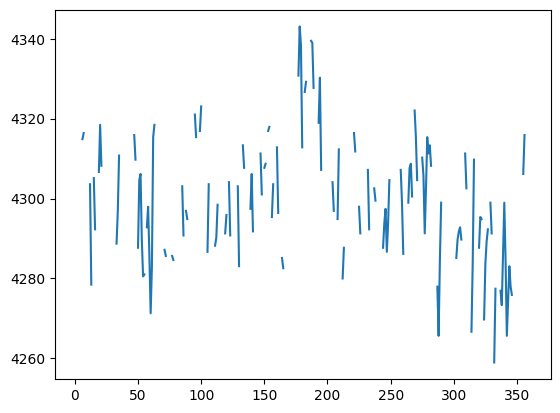

In [60]:
path = "..\Training Data\BrainVis_Preprocessing\eegs\\test"

def split(example, num_splits):
    return np.array(np.split(example, num_splits, axis=0))

def rejoin(splits):
    return splits.reshape((360,5))

def create_mask(splits, p):
    return np.random.choice([True, False], (splits.shape), [p, p-1])

def apply_mask(splits, mask):
    return np.ma.masked_array(splits, mask)
    # return np.where(mask, splits)

file = os.listdir(path)[0]
win_path = os.path.join(path, file)
eeg_df = pd.read_csv(win_path, index_col=0, header=None).T
eeg_npArray = np.array(eeg_df, dtype=np.float32)[:min_number_of_samples]

splits = split(eeg_npArray, 20)
mask = create_mask(splits, 0.001)
masked = apply_mask(splits, mask)
rejoined = rejoin(masked)


print(rejoined.shape)
plt.plot(rejoined[:,0])
plt.show()
